# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../traffic-signs-data/train.p"
validation_file= "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Training inputs: ",X_train.shape, type(X_train), ", data type of y_train: ", type(y_train))
print("Validation inputs: ",X_valid.shape)
print("Test inputs: ",X_test.shape)

Training inputs:  (34799, 32, 32, 3) <class 'numpy.ndarray'> , data type of y_train:  <class 'numpy.ndarray'>
Validation inputs:  (4410, 32, 32, 3)
Test inputs:  (12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_valid))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

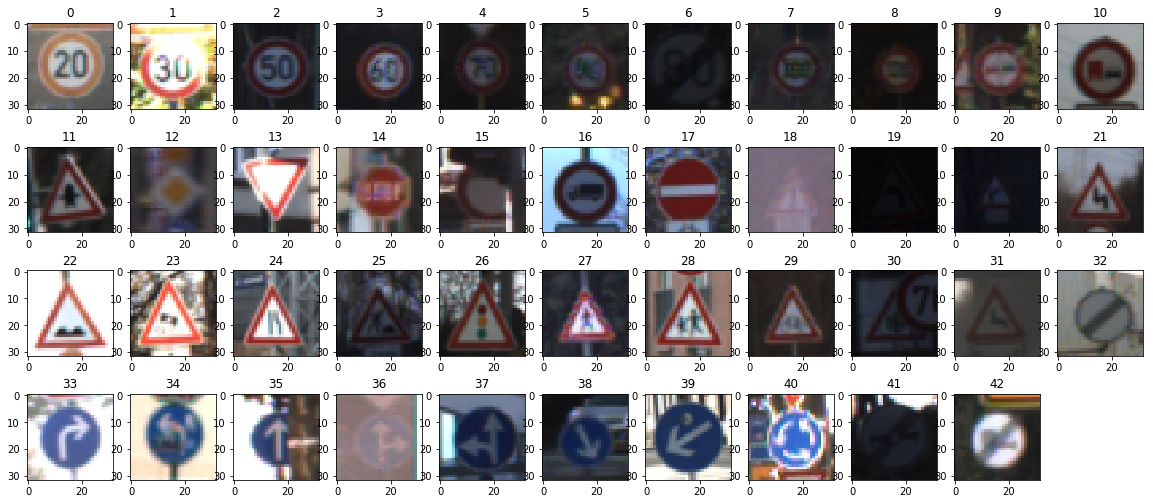

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

        
def visualize_images(imgs, color=""):
    """
    Visualize the image list
    """
    fig = plt.figure()
    i=1
    if color == "gray":
        for img in imgs:
            if (len(img.shape)>2):
                img = img.squeeze()
            ax = fig.add_subplot(1,len(imgs),i)
            i=i+1
            ax.imshow(img, cmap="gray")
    else:
        for img in imgs:
            if (len(img.shape)>2):
                img = img.squeeze()
            ax = fig.add_subplot(1,len(imgs),i)
            i=i+1
            ax.imshow(img)

def visualize_dataset_custom(xFeatures4D, yLabel, color='None', isRandom=False):
    """
    Visualize the images in the global training data set based on the label array
    """
    fig = plt.figure(figsize=(20, 11))
    num_unique_labels=len(set(yLabel))
    columns = 11
    subplotcounter=1
    subplotrows = round(num_unique_labels/columns)+1
    for idx in yLabel:
        #find index in global y_train
        found = np.where(y_train == idx)
        n_indices =len(found[0])
        if(n_indices > 0):
            if isRandom:
                index = found[0][np.random.randint(0,n_indices)] #generate random for multiple indices
            else:
                index = found[0][0]
            ax=fig.add_subplot(subplotrows, columns, subplotcounter)
            subplotcounter= subplotcounter+1
            ax.set_title(str(idx))
            if (color == "gray"):
                image = xFeatures4D[index,:,:,0]
                ax.imshow(image, cmap="gray")
            else:
                image = xFeatures4D[index,:,:,:]
                ax.imshow(image)
            
def visualize_unique_labels(xFeatures4D, yLabel, color='None'):
    """
    Visualize the images in the given data set based on the input label ONCE
    """
    if(color == "gray" and (xFeatures4D.shape[3]!= 1)):
        print("Warning: input array consists more than one layer")
    fig = plt.figure(figsize=(20, 11))
    num_unique_labels=len(set(yLabel))
    columns = 11
    subplotrows = round(num_unique_labels/columns)+1
    subplotcounter=1
    setLabels=[]
    for idx in set(yLabel):
        found = np.where(yLabel == idx)
        n_indices =len(found[0])
        if(n_indices > 0):
            index = found[0][np.random.randint(0,n_indices)] #tuple object that contains np.array
            
            ax=fig.add_subplot(subplotrows, columns, subplotcounter)
            subplotcounter= subplotcounter+1
            ax.set_title(str(idx))
            if (color == "gray"):
                image = xFeatures4D[index,:,:,0]
                ax.imshow(image, cmap="gray")
            else:
                image = xFeatures4D[index,:,:,:]
                ax.imshow(image)
        else:
            print("Warning: index not found")
            
visualize_unique_labels(X_train, y_train)


### Exploratory of the training datasets

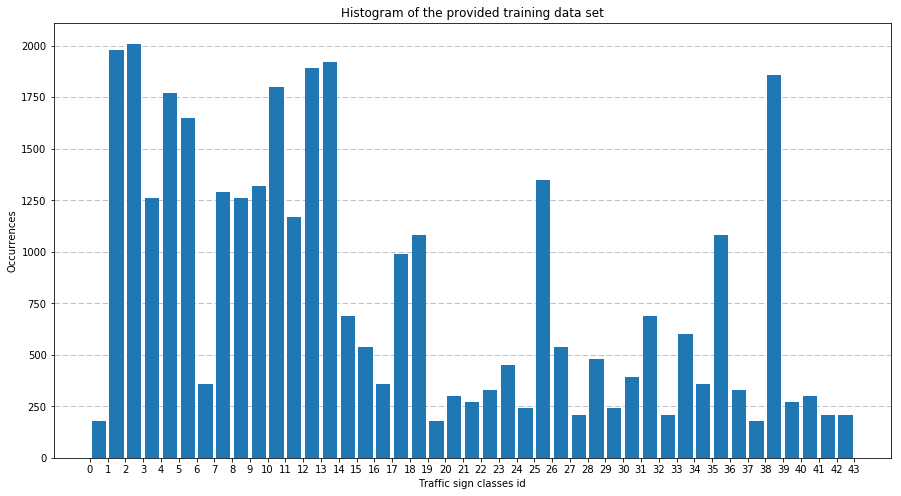

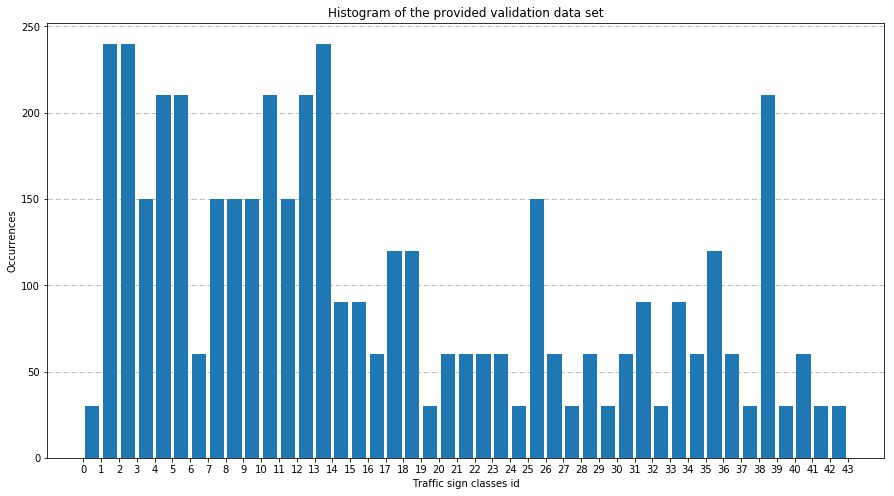

In [4]:
# Analyzing the training datasets
def show_histogram(data, title="Histogram of the datasets"):
    """
    Plotting histogram
    """
    fig_hist = plt.figure(figsize=(15, 8))
    ax = fig_hist.add_subplot(111)
    ax.hist(data,range(n_classes+1),rwidth=0.8, align="mid", zorder=3)
    ax.set_xticks(range(44))
    ax.yaxis.grid(True, linestyle='--',zorder=0)
    ax.set_ylabel('Occurrences')
    ax.set_xlabel('Traffic sign classes id')
    ax.set_title(title)
    plt.show()

show_histogram(y_train, "Histogram of the provided training data set")
show_histogram(y_valid, "Histogram of the provided validation data set")

From the above histogram, we can see that several labels are under-sampled. Thus, we need to add more images as our training dataset. We can do it by some image transformations.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

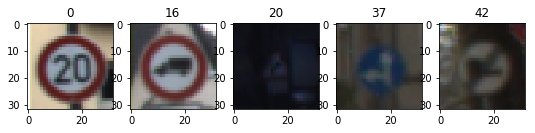

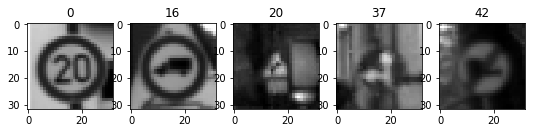

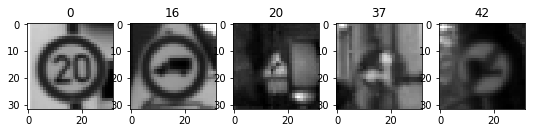

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def rgb2gray(img_arr4D):
    return np.sum(img_arr4D/3, axis=3, keepdims=True)

def normalize_gray(img_arr4D):
    return (img_arr4D - 128)/128 
    
def normalize_gray2(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

## Conduct the preprocessing

# Convert to gray by summing RGB and divided by 3
X_train_gray = rgb2gray(np.copy(X_train))
X_valid_gray = rgb2gray(np.copy(X_valid))
X_test_gray = rgb2gray(np.copy(X_test))

# Normalized Lecture Intro TensorFlow, section 23
X_train_gray_norm = normalize_gray(X_train_gray)
X_valid_gray_norm = normalize_gray(X_valid_gray)
X_test_gray_norm = normalize_gray(X_test_gray)

custom_labels = np.array([0, 16, 20, 37, 42])
visualize_dataset_custom(X_train, custom_labels )
visualize_dataset_custom(X_train_gray, custom_labels, "gray")
visualize_dataset_custom(X_train_gray_norm, custom_labels, "gray")

### Adding more new images for training dataset which label are under 500 samples

Rotated image shape:  (32, 32, 1)


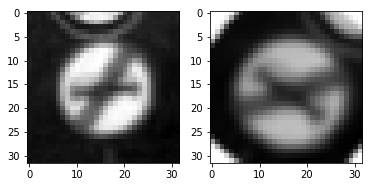

In [6]:
# Adding more training datasets which is undersampled
import cv2

def duplicate_img_by_rotation(img, scale=1.2, deg=None):
    """
    Generate an image which is randomly rotated and scaled from the original image
    """
    if deg is None:
        deg = np.random.randint(-40,40)
        if abs(deg) < 15: #avoid small change of rotation due to overfitting
            deg = deg*2
    res_img = np.zeros((image_shape[0],image_shape[1],1))
    #enlarge the image before rotating to avoid black border after rotation
    resized_img = cv2.resize(img,None,fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC)
    new_rows, new_cols = resized_img.shape
    M = cv2.getRotationMatrix2D((new_cols/2,new_rows/2),deg,1)
    rotated_img = cv2.warpAffine(resized_img,M,(new_cols,new_rows))
    #Translation
    x_trans = (image_shape[0] - new_rows)/2.5
    y_trans = (image_shape[1] - new_cols)/2.5
    M = np.float32([[1,0,x_trans],[0,1,y_trans]])
    res_img[:,:,0] = cv2.warpAffine(rotated_img, M,(image_shape[1],image_shape[0]))
    return res_img

#Preview rotation image test
test = duplicate_img_by_rotation(X_train_gray_norm[10], 1.2, -40)
print ("Rotated image shape: ",test.shape)

visualize_images([X_train_gray_norm[10],test], "gray")



Training label 0 occurs 180 times. Generating images...

Training label 6 occurs 360 times. Generating images...

Training label 16 occurs 360 times. Generating images...

Training label 19 occurs 180 times. Generating images...

Training label 20 occurs 300 times. Generating images...

Training label 21 occurs 270 times. Generating images...

Training label 22 occurs 330 times. Generating images...

Training label 23 occurs 450 times. Generating images...

Training label 24 occurs 240 times. Generating images...

Training label 27 occurs 210 times. Generating images...

Training label 29 occurs 240 times. Generating images...

Training label 30 occurs 390 times. Generating images...

Training label 32 occurs 210 times. Generating images...

Training label 34 occurs 360 times. Generating images...

Training label 36 occurs 330 times. Generating images...

Training label 37 occurs 180 times. Generating images...

Training label 39 occurs 270 times. Generating images...

Training label 4

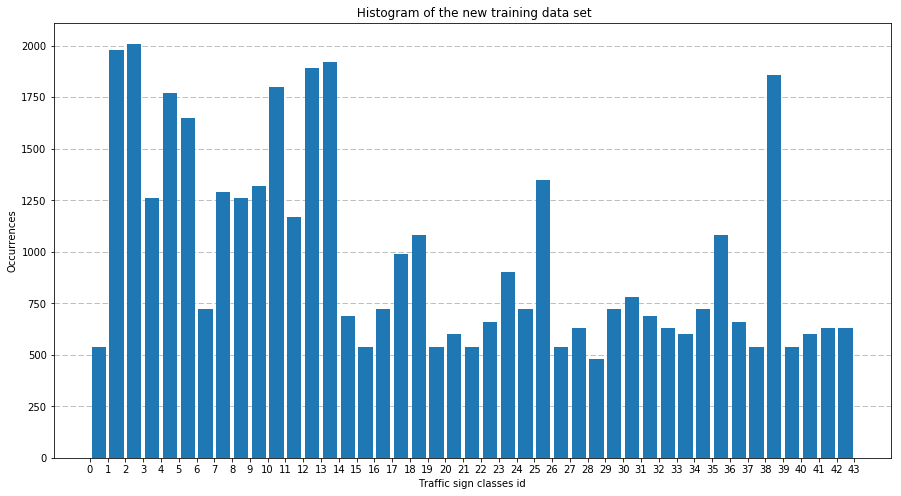

In [7]:
# Generating images by rotating from the given training datasets
X_train_new_imgs = np.copy(X_train_gray_norm)
y_train_new_imgs = np.copy(y_train)
threshold = 470

for i in range(n_classes):
    occur = np.count_nonzero(y_train == i)
    if occur < threshold:
        print("Training label %d occurs %d times. Generating images..." % (i,occur))
        #get all the index location of the label image
        found_indices = np.where(y_train == i)[0]
        print("")
        for idx in found_indices:
            newimg=duplicate_img_by_rotation(X_train_gray_norm[idx])
            X_train_new_imgs= np.concatenate((X_train_new_imgs, [newimg]), axis=0)
            y_train_new_imgs= np.concatenate( (y_train_new_imgs, [i]), axis=0)
            # make 2x more images if the occurence is under 250 samples
            if occur <250:
                # to avoid overfitting this time we use another scale
                newimg=duplicate_img_by_rotation(X_train_gray_norm[idx], 1.1)
                X_train_new_imgs= np.concatenate((X_train_new_imgs, [newimg]), axis=0)
                y_train_new_imgs= np.concatenate( (y_train_new_imgs, [i]), axis=0)
                
show_histogram(y_train_new_imgs," Histogram of the new training data set")



Validation label 0 occurs 30 times. Generating more images...
Validation label 19 occurs 30 times. Generating more images...
Validation label 24 occurs 30 times. Generating more images...
Validation label 27 occurs 30 times. Generating more images...
Validation label 29 occurs 30 times. Generating more images...
Validation label 32 occurs 30 times. Generating more images...
Validation label 37 occurs 30 times. Generating more images...
Validation label 39 occurs 30 times. Generating more images...
Validation label 41 occurs 30 times. Generating more images...
Validation label 42 occurs 30 times. Generating more images...


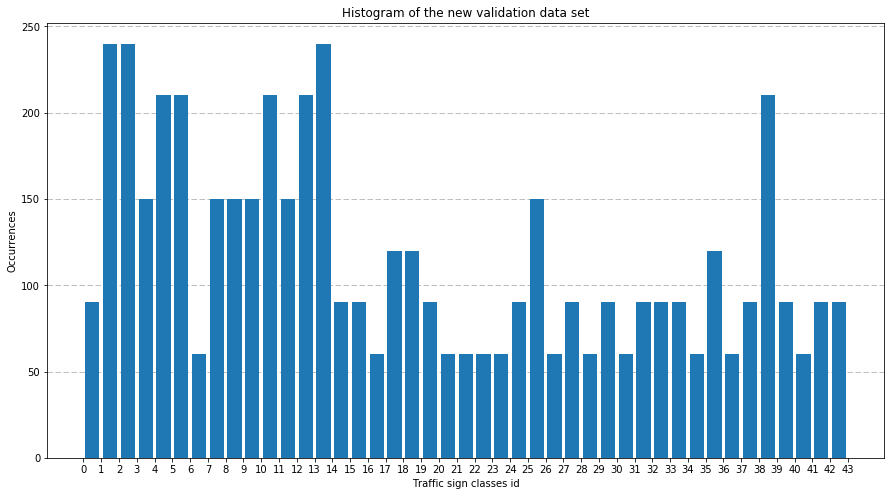

In [8]:
# Generating images by rotating from the given VALIDATION datasets
X_valid_new_imgs = np.copy(X_valid_gray_norm)
y_valid_new_imgs = np.copy(y_valid)
threshold = 50

for i in range(n_classes):
    occur = np.count_nonzero(y_valid == i)
    if occur < threshold:
        print("Validation label %d occurs %d times. Generating more images..." % (i,occur))
        #get all the index location of the label image
        found_indices = np.where(y_valid == i)[0]
        for idx in found_indices:
            newimg=duplicate_img_by_rotation(X_valid_gray_norm[idx])
            X_valid_new_imgs= np.concatenate((X_valid_new_imgs, [newimg]), axis=0)
            y_valid_new_imgs= np.concatenate( (y_valid_new_imgs, [i]), axis=0)
            newimg=duplicate_img_by_rotation(X_valid_gray_norm[idx], 1.1)
            X_valid_new_imgs= np.concatenate((X_valid_new_imgs, [newimg]), axis=0)
            y_valid_new_imgs= np.concatenate( (y_valid_new_imgs, [i]), axis=0)
                
show_histogram(y_valid_new_imgs, "Histogram of the new validation data set")

In [9]:
print("Number of new training data set = ", len(y_train_new_imgs))
print("Number of new validation data set = ", len(y_valid_new_imgs))
print("The test data set is not added")

Number of new training data set =  42239
Number of new validation data set =  5010
The test data set is not added


# Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128
from tensorflow.contrib.layers import flatten

def YoWiNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.15
    
    # Layer 1: Convolutional. Input = 32x32x1. 6 Filter of 5x5x1 Output = 28x28x6.
    l1_conv_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    l1_conv_b = tf.Variable(tf.zeros(6))
    l1_conv   = tf.nn.conv2d(x, l1_conv_W, strides=[1, 1, 1, 1], padding='VALID') + l1_conv_b

    # Activation.
    l1_conv = tf.nn.relu(l1_conv)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    l1_conv_pool = tf.nn.max_pool(l1_conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print("Layer 1 output shape: ", l1_conv_pool.get_shape())
    
    # Layer 2-1: Convolutional. Input L1 14x14x6, 16 filters of 5x5x6 Output = 10x10x16.
    l2_conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    l2_conv1_b = tf.Variable(tf.zeros(16))
    l2_conv1   = tf.nn.conv2d(l1_conv_pool, l2_conv1_W, strides=[1, 1, 1, 1], padding='VALID') + l2_conv1_b
    
    # Activation.
    l2_conv1 = tf.nn.relu(l2_conv1)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    l2_conv1_pool = tf.nn.max_pool(l2_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print("Layer 2-1 output shape: ", l2_conv1_pool.get_shape())
    
    # Layer 2-2: Convolutional. Input L1:14x14x6; 20 filters of 5x5x6; Output = 10x10x20.
    l2_conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 20), mean = mu, stddev = sigma))
    l2_conv2_b = tf.Variable(tf.zeros(20))
    l2_conv2   = tf.nn.conv2d(l1_conv_pool, l2_conv2_W, strides=[1, 1, 1, 1], padding='VALID') + l2_conv2_b
    
    # Activation. Output = 10x10x20
    l2_conv2 = tf.nn.relu(l2_conv2)

    # No pooling
    # Pooling. Input = 10x10x20. Output = 5x5x20.
    l2_conv2_pool = tf.nn.max_pool(l2_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print("Layer 2-2 output shape: ", l2_conv2_pool.get_shape())
    # Flatten. Input = 5x5x16. Output = 400.
    l2_flat1   = flatten(l2_conv1_pool)
    
    #print(flat_l2.get_shape())
    # Flatten. Input = 5x5x20. Output = 500.
    l2_flat2   = flatten(l2_conv2_pool)

    # Layer 3: Fully Connected. Input = 400. Output = 100.
    l3_fc_W  = tf.Variable(tf.truncated_normal(shape=(400, 100), mean = mu, stddev = sigma))
    l3_fc_b  = tf.Variable(tf.zeros(100))
    l3_fc    = tf.matmul(l2_flat1, l3_fc_W) + l3_fc_b
    
    # Activation.
    l3_fc    = tf.nn.relu(l3_fc)
    print("Layer 3 output shape: ", l3_fc.get_shape())
    
    # Layer 4: output 100+500 = 600
    l4_concat  = tf.concat_v2([l2_flat2, l3_fc], 1)
    print("Layer 4 output shape: ", l4_concat.get_shape())
    
    # Layer 5: Fully Connected. Input = 600. Output = 100.
    l5_fc_W  = tf.Variable(tf.truncated_normal(shape=(600, 100), mean = mu, stddev = sigma))
    l5_fc_b  = tf.Variable(tf.zeros(100))
    l5_fc    = tf.matmul(l4_concat, l5_fc_W) + l5_fc_b
    
    print("Layer 5 output shape: ", l5_fc.get_shape())
    # Layer 6: Fully Connected. Input = 100. Output = number of classes.
    l6_fc_W  = tf.Variable(tf.truncated_normal(shape=(100, 60), mean = mu, stddev = sigma))
    l6_fc_b  = tf.Variable(tf.zeros(60))
    l6_fc = tf.matmul(l5_fc, l6_fc_W) + l6_fc_b
    print("Layer 6 output shape: ", l6_fc.get_shape())
    
    # Layer 6: Fully Connected. Input = 60. Output = number of classes.
    l7_fc_W  = tf.Variable(tf.truncated_normal(shape=(60, n_classes), mean = mu, stddev = sigma))
    l7_fc_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(l6_fc, l7_fc_W) + l7_fc_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
# one hot clasification based on the number of the classes
one_hot_y = tf.one_hot(y, n_classes)

#Training Pipeline
rate = 0.0007

logits = YoWiNet(x)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Layer 1 output shape:  (?, 14, 14, 6)
Layer 2-1 output shape:  (?, 5, 5, 16)
Layer 2-2 output shape:  (?, 5, 5, 20)
Layer 3 output shape:  (?, 100)
Layer 4 output shape:  (?, 600)
Layer 5 output shape:  (?, 100)
Layer 6 output shape:  (?, 60)


In [12]:
#Model Training
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray_norm, y_train = shuffle(X_train_gray_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_gray_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './yowinet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.723

EPOCH 2 ...
Validation Accuracy = 0.869

EPOCH 3 ...
Validation Accuracy = 0.894

EPOCH 4 ...
Validation Accuracy = 0.904

EPOCH 5 ...
Validation Accuracy = 0.907

EPOCH 6 ...
Validation Accuracy = 0.919

EPOCH 7 ...
Validation Accuracy = 0.921

EPOCH 8 ...
Validation Accuracy = 0.930

EPOCH 9 ...
Validation Accuracy = 0.918

EPOCH 10 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.930

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 19 ...
Validation Accuracy = 0.927

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.922

EPOCH 22 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.918

EPOCH 24 ...
Validation Accura

# Test model

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.930


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

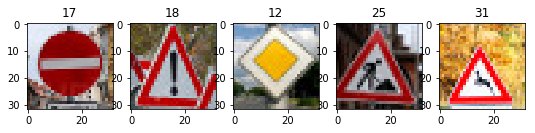

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os,cv2
new_images_col=[]

img_paths= [
    "./new_imgs/12.jpg",
    "./new_imgs/17.jpg",
    "./new_imgs/18.jpg",
    "./new_imgs/25.jpg",
    "./new_imgs/31.jpg",]
y_newlabels=np.array([12, 17, 18, 25, 31])

for file in img_paths:
    if not os.path.exists(file):
        file(file, 'w').close()
        print("Warning: File not found!")
    else:
        img_col = cv2.imread(file)
        #thanks to http://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
        new_images_col.append(cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB))

#change shape to 4D array as like X_train
new_images_col= np.asarray(new_images_col)
visualize_unique_labels(new_images_col, y_newlabels)


### Predict the Sign Type for Each Image

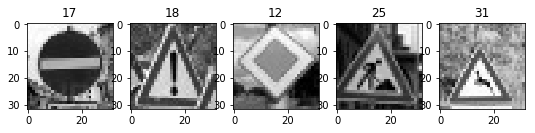

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


new_images_gray = rgb2gray(new_images_col)
new_images_gray = normalize_gray(new_images_gray)
visualize_unique_labels(new_images_gray, y_newlabels,"gray")
prediction_label=[12, 17, 18, 25, 31]

### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import tensorflow as tf 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    web_saver = tf.train.import_meta_graph('./yowinet.meta')
    web_saver.restore(sess, "./yowinet")
    web_accuracy = evaluate(new_images_gray, prediction_label)
    print("Test Set Accuracy = {:.3f}".format(web_accuracy))

Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
predict_softmax_logits = tf.nn.softmax(logits)

tf_top_k = tf.nn.top_k(predict_softmax_logits, k=5)
results = []
indices = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./yowinet.meta')
    saver.restore(sess, "./yowinet")
    
    softmax_logits = sess.run(predict_softmax_logits, feed_dict={x: new_images_gray})
    results, indices = sess.run(tf_top_k, feed_dict={x: new_images_gray})
    


[[  1.00000000e+00   5.51265847e-14   4.96181064e-18   2.28938269e-21
    1.42569402e-25]
 [  1.00000000e+00   1.54446906e-24   6.93094177e-25   2.77611394e-25
    3.64096902e-26]
 [  1.00000000e+00   8.62582619e-18   6.70044793e-18   1.16189543e-27
    0.00000000e+00]
 [  1.00000000e+00   6.01819490e-17   3.04676005e-22   4.19344997e-25
    1.42764719e-26]
 [  1.00000000e+00   2.00691304e-08   9.47578793e-10   5.56495890e-19
    1.25000342e-19]]
[[12  2 40 13  1]
 [17 34 41 14 32]
 [18 26 27 11  0]
 [25 20 22 24 23]
 [31 11 21  4 19]]


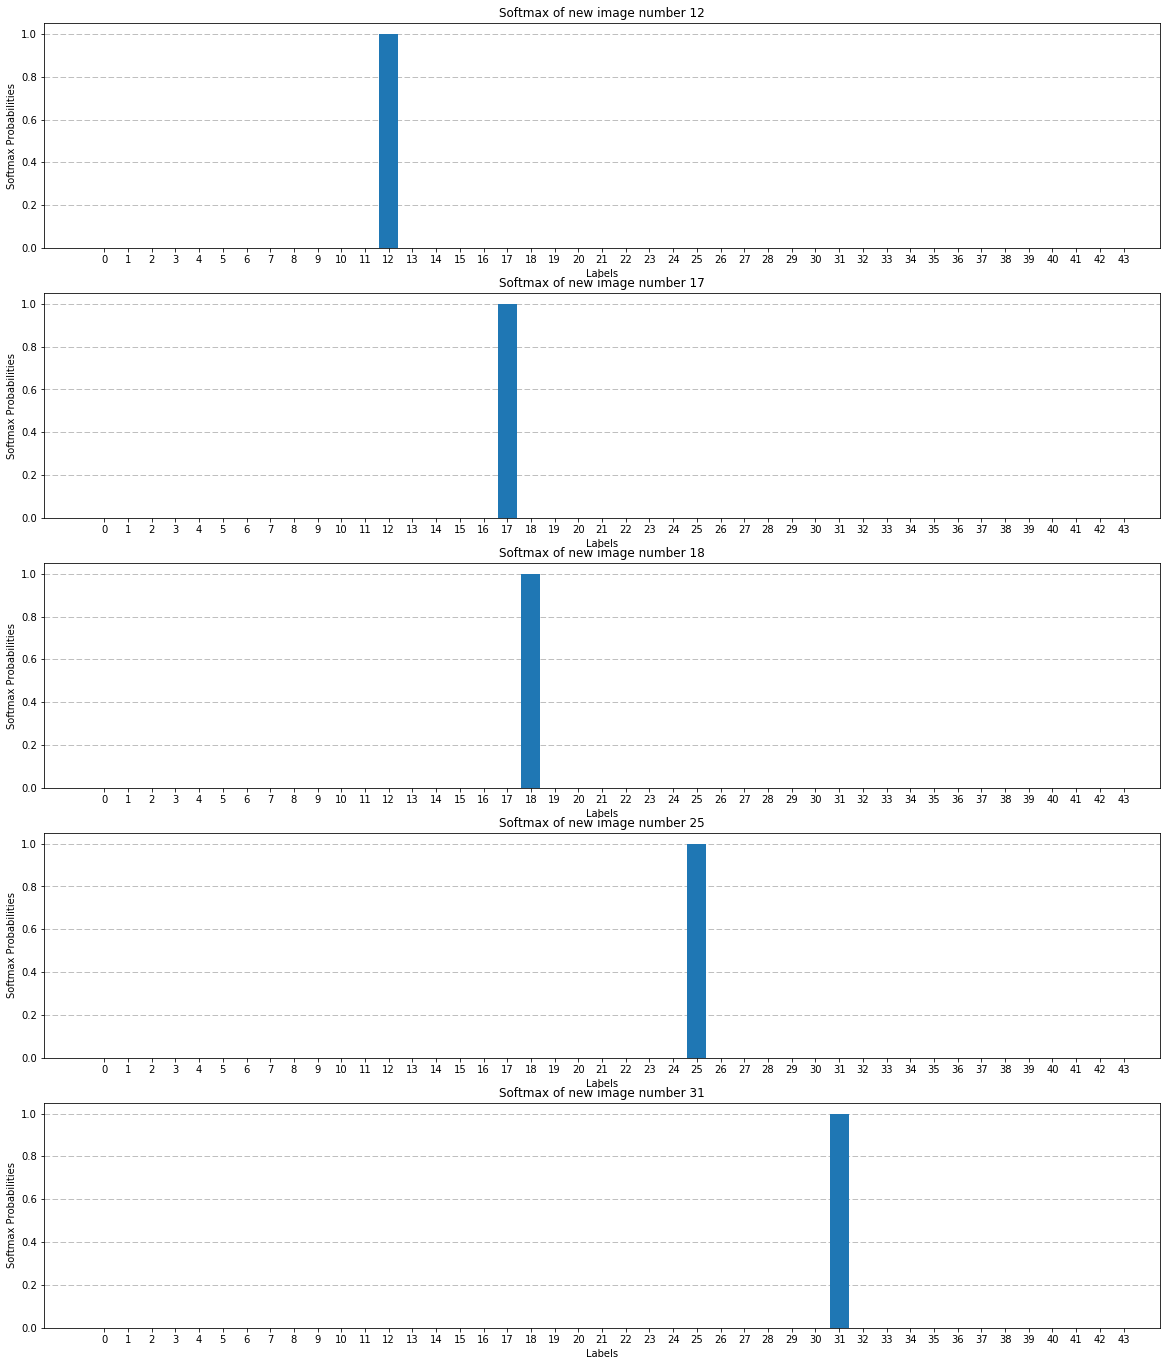

In [20]:
print(results)
print(indices)

xvalues = np.array(range(n_classes))

fig=plt.figure(figsize=(20,24))

for i in range(len(results)):
    ax = fig.add_subplot(len(results), 1, i+1)
    ax.set_xticks(range(44))
    title= "Softmax of new image number "+str(y_newlabels[i])
    ax.set_title(title)
    ax.set_ylabel('Softmax Probabilities')
    ax.set_xlabel('Labels')
    ax.yaxis.grid(True, linestyle='--',zorder=0)
    yvalues= np.zeros(n_classes)
    for j in range(len(results)):
        label_id = indices[i][j]
        prob = results[i][j]
        yvalues[label_id]= prob
            
    plt.bar(xvalues, yvalues, zorder=3)
        

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 